In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./nifty50/HDFC.csv")
#dataset

In [3]:
#dataset.isnull().sum()

In [4]:
dataset.dropna(inplace=True)
#dataset

In [5]:
#dataset.columns

In [6]:
date = dataset['Date']
#date

In [7]:
to_drop = ['Date', 'Symbol', 'Series']
dataset = dataset.drop(columns = to_drop)
#dataset

In [8]:
df = dataset
#df

## input features and target

In [9]:
dataset.columns

Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
       'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'],
      dtype='object')

In [10]:
tar_col = ['VWAP']
Y = dataset[tar_col]
#Y

In [11]:
X = dataset.drop(columns = tar_col)
#X

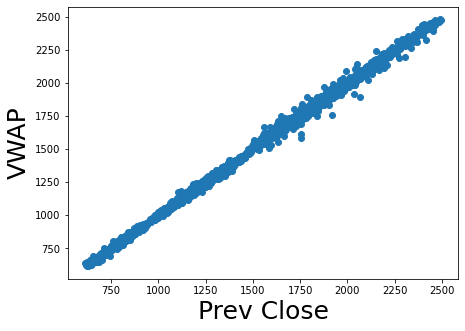

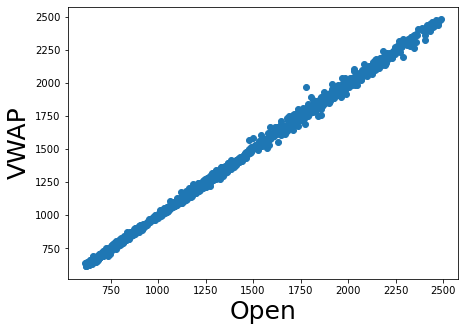

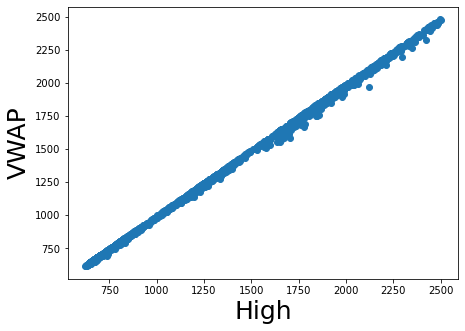

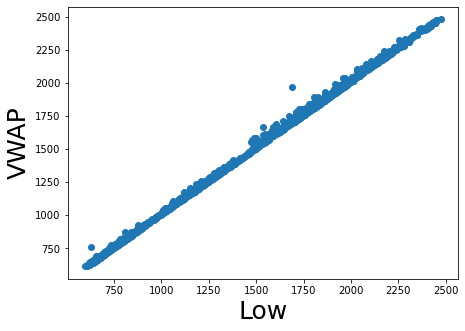

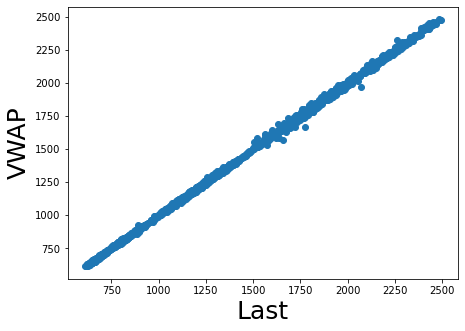

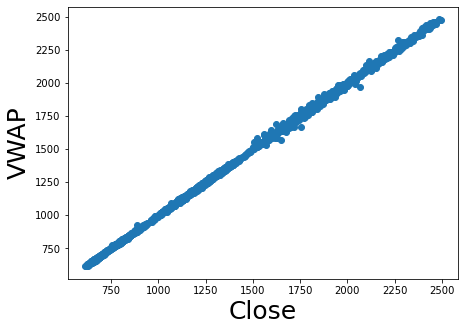

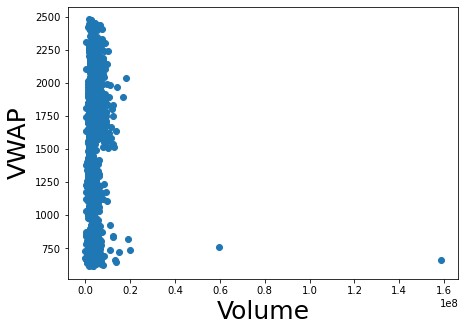

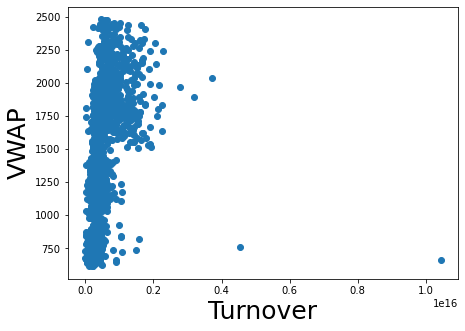

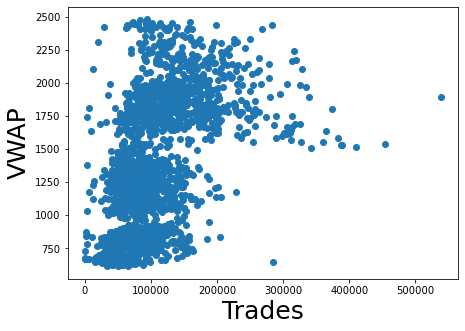

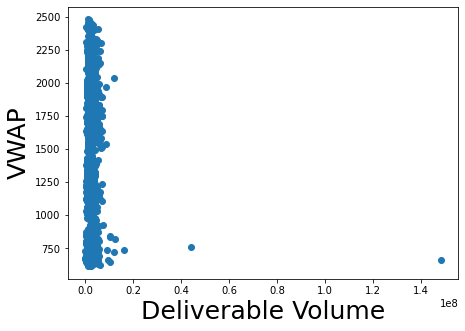

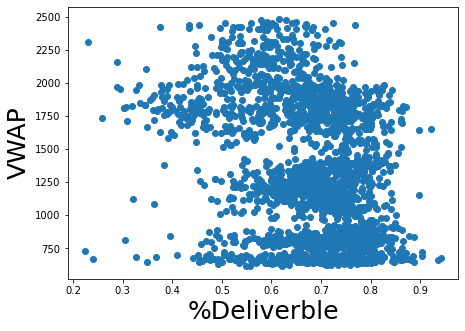

In [12]:
for feature_name in X:
    plt.figure(figsize=(7,5))
    plt.tight_layout()
    plt.scatter(X[feature_name], Y)
    plt.ylabel(tar_col[0],size = 25)

    plt.xlabel(feature_name, size = 25)
    plt.show()

In [13]:
X = np.array(X)
#X
X.shape

(2354, 11)

In [14]:
Y = np.array(Y)
#Y
Y.shape

(2354, 1)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# SVM

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')

In [18]:
#Y_train = Y_train.reshape(Y_train.shape[0],)
Y_train.shape

(1883, 1)

In [19]:
clf.fit(X_train,Y_train)
#clf.fit(X,Y)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Unknown label type: 'continuous'

In [20]:
y_pred = clf.predict(X_test)

print(accuracy_score(Y_test, y_pred))

sum(abs(y_pred.reshape(Y_test.shape) - Y_test))

AttributeError: 'SVC' object has no attribute 'shape_fit_'